## Demonstration with Blood Transfusion Data

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', header=None)

In [3]:
# Get the data and its  label from the dataframe
x = df.loc[1:, 0:3].values.astype(int)
y = df.loc[1:, 4].values.astype(int)

# Peek the data
x.shape, y.shape, x[:1], y[:30]

((748, 4),
 (748,),
 array([[    2,    50, 12500,    98]]),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0]))

In [4]:
# See stats all the features
stats = np.vstack(( np.min(x, 0), np.max(x, 0), np.mean(x, 0), np.std(x, 0)))
df_stats = pd.DataFrame(stats)
df_stats.rename({0: "Min", 1: "Max", 2: "Mean", 3: "Std"})

,0,1,2,3
Min,0.000000,1.000000,250.000000,2.000000
Max,74.000000,50.000000,12500.000000,98.000000
Mean,9.506684,5.514706,1378.676471,34.282086
Std,8.089982,5.835403,1458.850634,24.360414


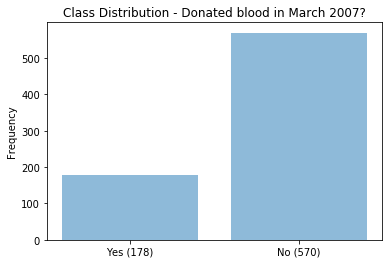

In [5]:
# See the class distribution
n_yes = len(np.where(y == 1)[0])
n_no = len(np.where(y == 0)[0])
classes = ('Yes (%s)' % (n_yes), 'No (%s)' % (n_no))
y_pos = np.arange(len(classes))
plt.bar(y_pos, [n_yes, n_no], align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Frequency')
plt.title('Class Distribution - Donated blood in March 2007?')
plt.show()

### Data Transformation

In [6]:
# Normalize x
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)
# See stats all the features
stats_normalized = np.vstack(( np.min(x, 0), np.max(x, 0), np.mean(x, 0), np.std(x, 0)))
df_stats_normalized = pd.DataFrame(stats_normalized)
df_stats_normalized.rename({0: "Min", 1: "Max", 2: "Mean", 3: "Std"})

,0,1,2,3
Min,-1.175118e+00,-7.736751e-01,-7.736751e-01,-1.325186e+00
Max,7.971997e+00,7.623346e+00,7.623346e+00,2.615633e+00
Mean,3.799694e-17,-1.899847e-17,-5.699541e-17,3.799694e-17
Std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Divide the data
# Training 70%, Test 30%
n = int(0.7 * x.shape[0])
x_train, y_train = x[:n], y[:n]
x_test, y_test = x[n:], y[n:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((523, 4), (523,), (225, 4), (225,))

### Logistic Regression at Play

In [8]:
from log_regression import LogisticRegression

In [9]:
# Training with alpha = 0.01
classifier = LogisticRegression(alpha=0.01)
classifier.fit(x_train, y_train, 10000)
acc, conf = classifier.evaluate(x_train, y_train, verbose=True)

Accuracy: 0.762906309751
Confusion matrix: 
 [[ 375.   13.]
 [ 111.   24.]]


In [10]:
# See the score for test data
acc, conf = classifier.evaluate(x_test, y_test, verbose=True)

Accuracy: 0.804444444444
Confusion matrix: 
 [[ 181.    1.]
 [  43.    0.]]


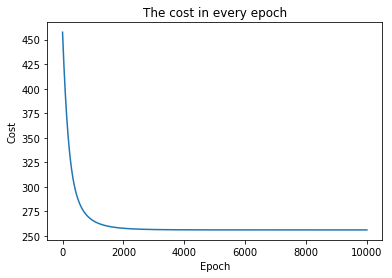

In [11]:
# See the cost log graph
import matplotlib.pyplot as plt 

x = np.arange(len(classifier.cost_log)) + 1
plt.plot(x, classifier.cost_log)
plt.title('The cost in every epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()